In [100]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [101]:
bank_credit=pd.read_csv(r"C:\Users\mahab\Downloads\Telegram Desktop\credit_risk_dataset.csv")

In [102]:
bank_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# summary about the dataset :
The dataset contains information about people borrowing money from bank in which we have the details of borrower like Age, income, employment length, home ownership, and credit history length.we have the data of loan details like : Loan amount, purpose, interest rate, and loan-to-income ratio.our main goal is decrease the decrease the risk of defaulters from the bank 

##  Available Variables :

1.persons_age(Customer'sage):Age of the person(integer)

2.person_income:Anual income of the person(integer)

3.person_home_ownership: Type of home ownership (categorical: RENT, OWN, MORTGAGE, etc.)

4.person_emp:Length of employment in years (float ,has missing values)

5.loan_intent(loan intent):The purpose of the loan (e.g.,education,medical,personal)
6.loan_grade : Grade assigned to the loan(categorical:A,B,etc.a)

7.loan_amnt : Loan amount(integer).

8.loan_int_rate : interest rate on the loan (float,has missing values)

9.loan_status : Target variable; the loan is defaulted (1) or not (0)

10.loan_percent_income: Percentage of income committed to the loan (float).

11.cb_person_default_on_file: Whether the person has defaulted previously (categorical: Y or N)

12.cb_person_cred_hist_length: Length of credit history in years (integer).

#### creating a copy of the original dataset to do some test on the dataset

In [103]:
credit_df=bank_credit.copy()
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Cleaning

In [106]:
bank_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [107]:
bank_credit.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [108]:
bank_credit.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
27585,34,78000,RENT,9.0,DEBTCONSOLIDATION,E,15000,16.40,1,0.19,N,5
27337,35,122000,MORTGAGE,3.0,VENTURE,D,25000,15.20,1,0.20,N,10
16600,24,75000,RENT,0.0,EDUCATION,A,12000,6.62,0,0.16,N,3


In [109]:
bank_credit.shape

(32581, 12)

In [110]:
bank_credit.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [113]:
bank_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [114]:
bank_credit.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [115]:
bank_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


####  They are missing values in the dataset and the columns in which missing values are present are person_emp_length and loan_int_rate 

In [116]:
# the totalsum of  missing values in  each column
bank_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [117]:
bank_credit.isnull().sum()/len(bank_credit)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# data preprocessing

In [118]:
# 1. Handling Missing Values:
# Identify columns with missing values
missing_values = bank_credit.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [120]:
# Choose a strategy for imputation or removal based on the nature of the missing data
# Example: Fill numerical missing values with the mean
for col in bank_credit.select_dtypes(include=['number']):
    if bank_credit[col].isnull().any():
        bank_credit[col] = bank_credit[col].fillna(bank_credit[col].median())

       

In [121]:
bank_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [122]:
# Re-check missing values after imputation
missing_values_after = bank_credit.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)


Missing values after imputation:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


# # 2. Outlier Detection and Treatment

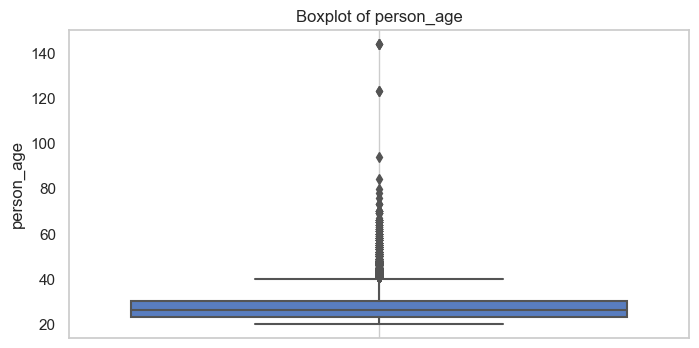

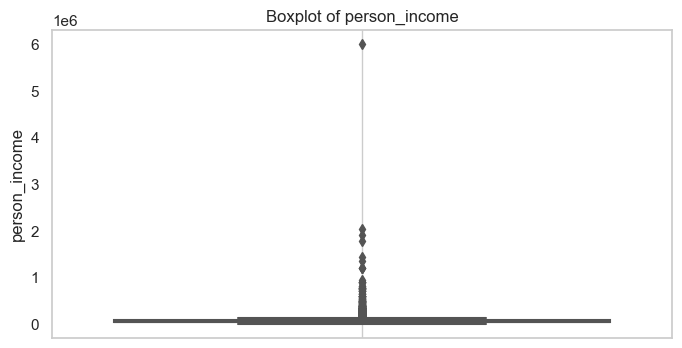

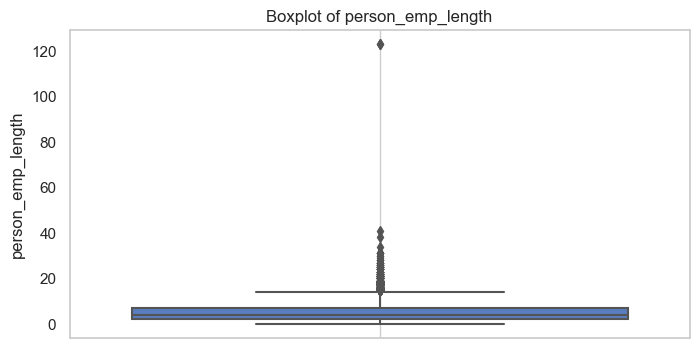

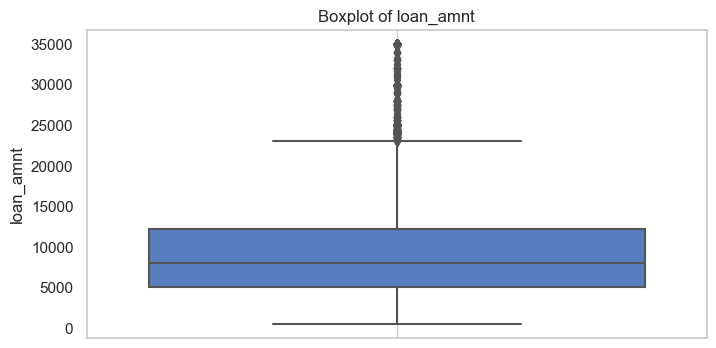

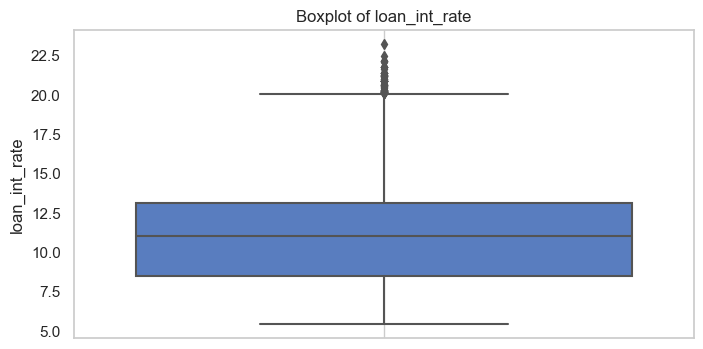

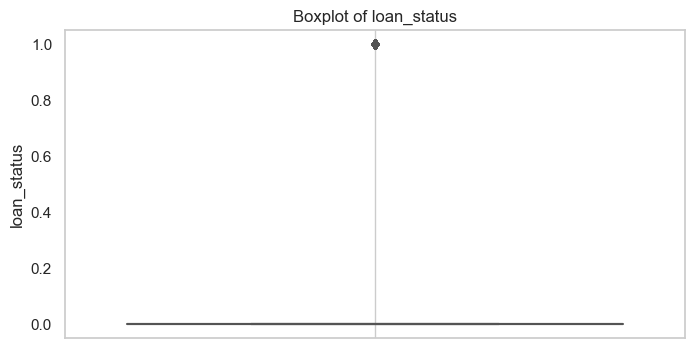

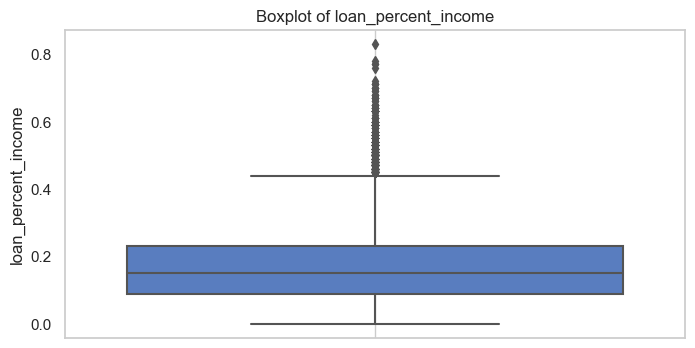

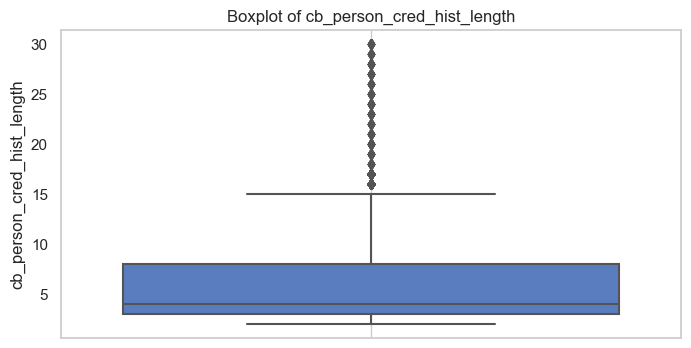

In [123]:
out=bank_credit.select_dtypes(include=['number']).columns
for i in out:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=bank_credit[i])
    plt.title(f'Boxplot of {i}')
    plt.grid()
    plt.show()    

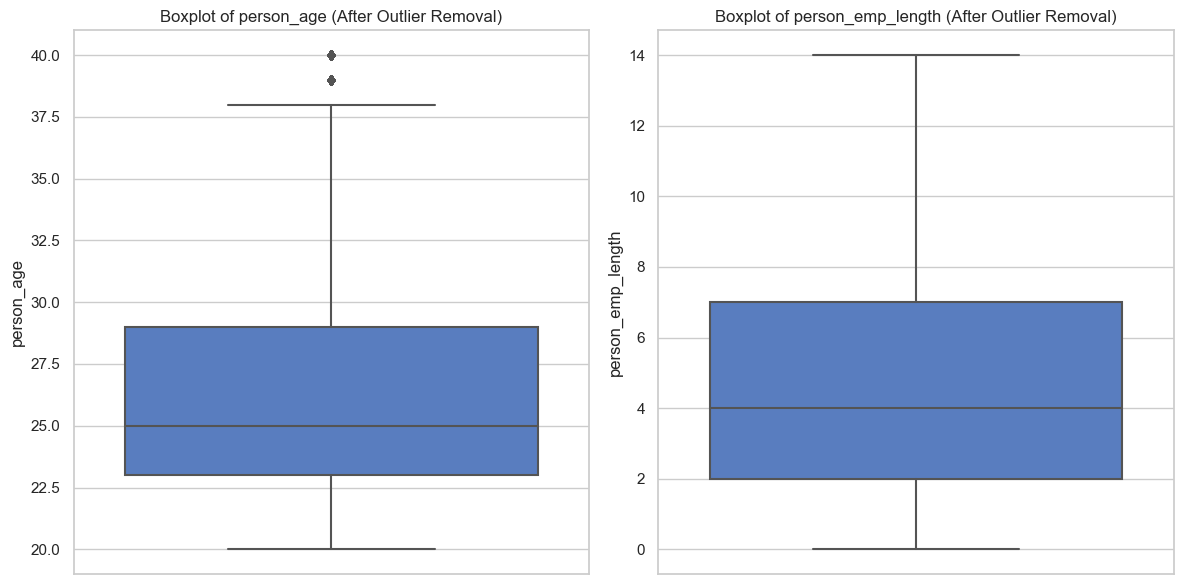

In [124]:
def remove_out(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df_filter=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    return df_filter

crd_filtered_age = remove_out(bank_credit, 'person_age')
crd_filtered = remove_out(crd_filtered_age,'person_emp_length')

# Visualize the data after outlier removal (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=crd_filtered['person_age'])
plt.title('Boxplot of person_age (After Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=crd_filtered['person_emp_length'])
plt.title('Boxplot of person_emp_length (After Outlier Removal)')

plt.tight_layout()
plt.show()

In [125]:
crd_filtered

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0,0.03,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13


# Exploratory Data Analysis (EDA)

## Column Types

. Numerical -person_age,person_income,person_emp_length ,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length

. Categorical - person_home_ownership,loan_intent, loan_grade,loan_status,cb_person_default_on_file,

## Univariate Analysis (Visualizing Distributions)

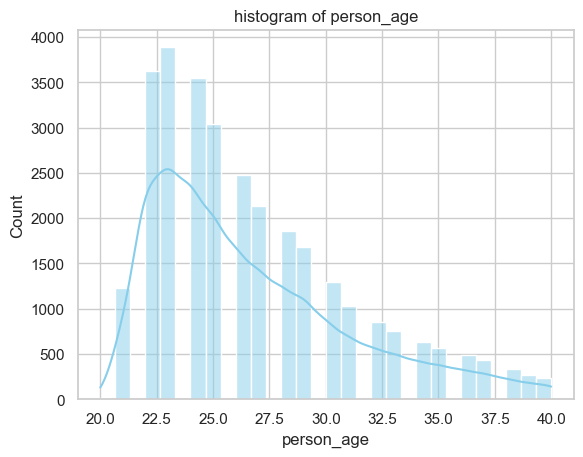

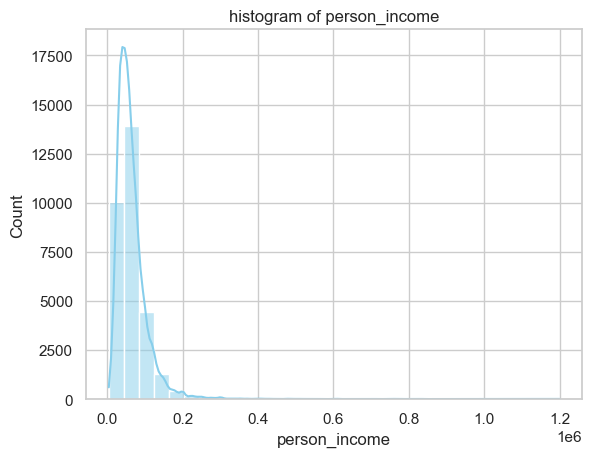

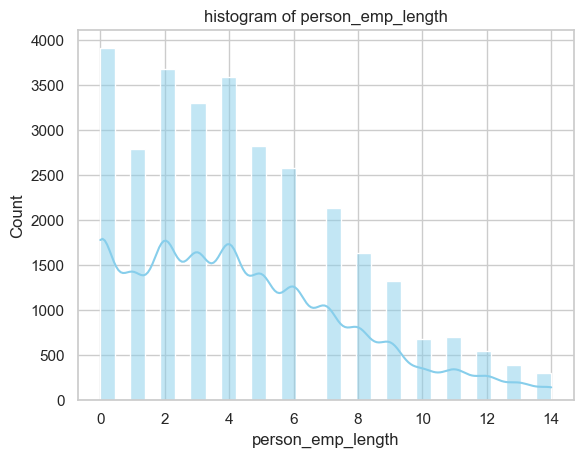

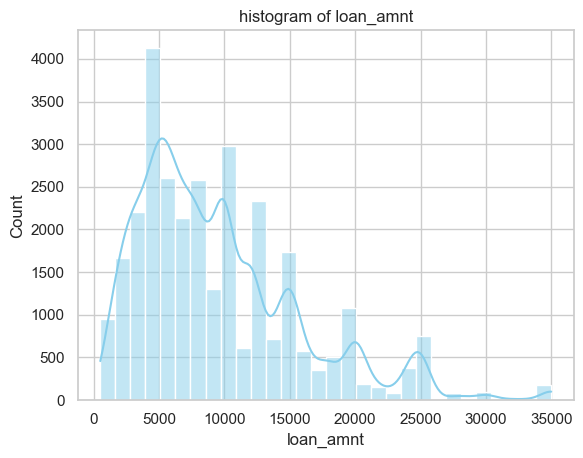

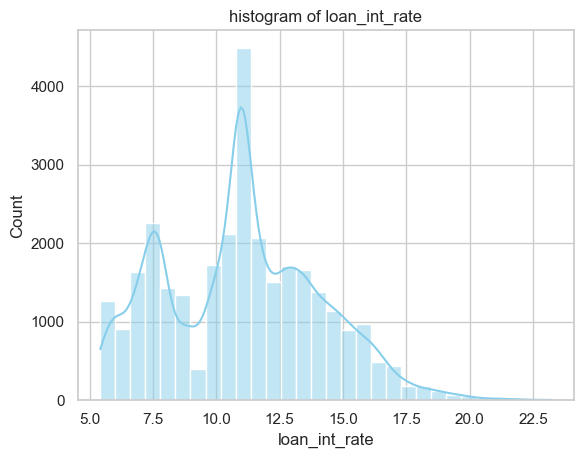

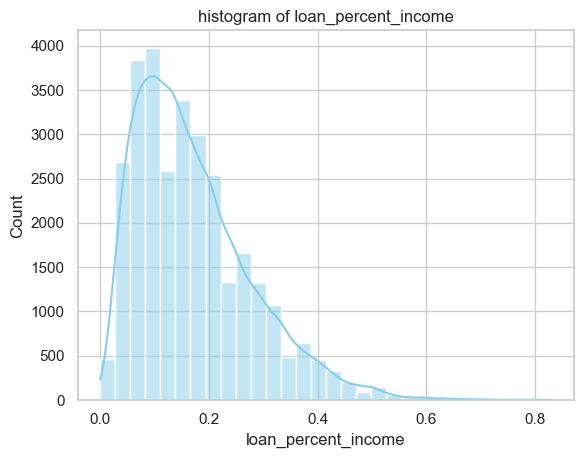

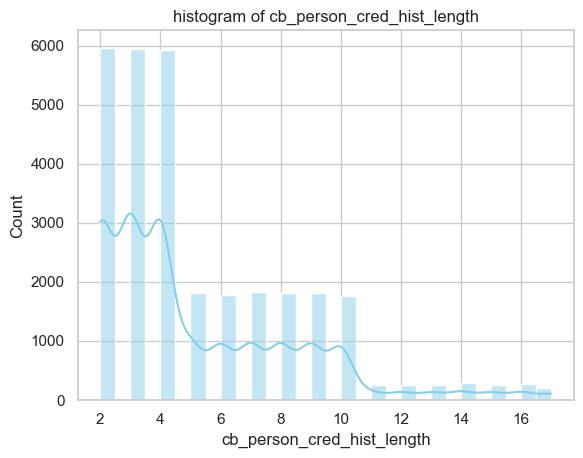

In [127]:
# numerical 
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Numerical variables: Histograms, box plots
for col in numerical_columns:
    plt.figure()
    sns.histplot(crd_filtered,x=crd_filtered[col],color='skyblue',bins=30,kde=True)
    plt.title(f'histogram of {col}')
    plt.show()
    

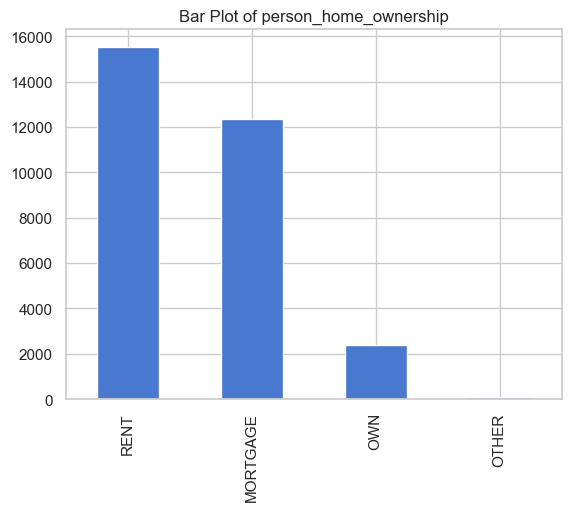

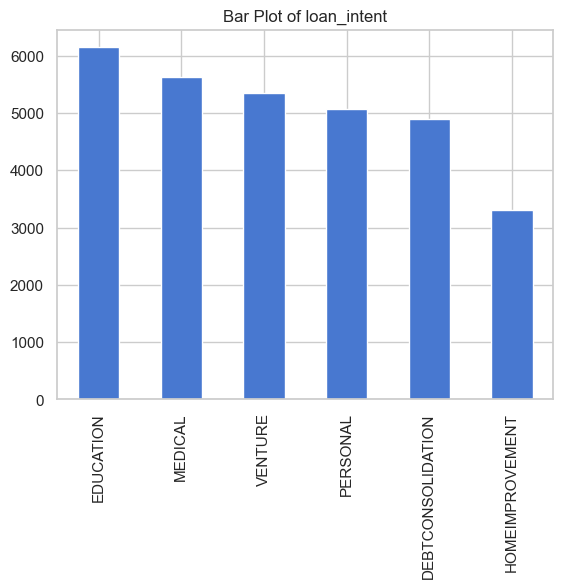

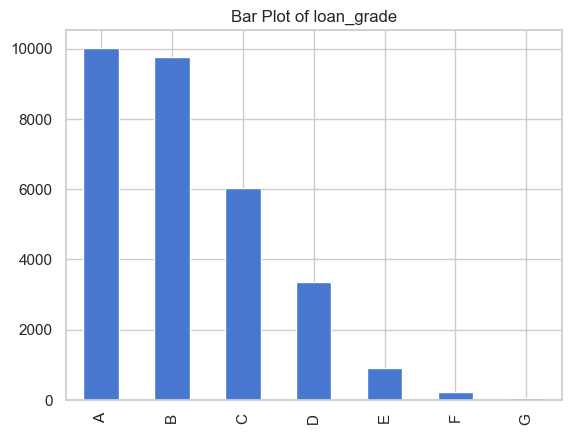

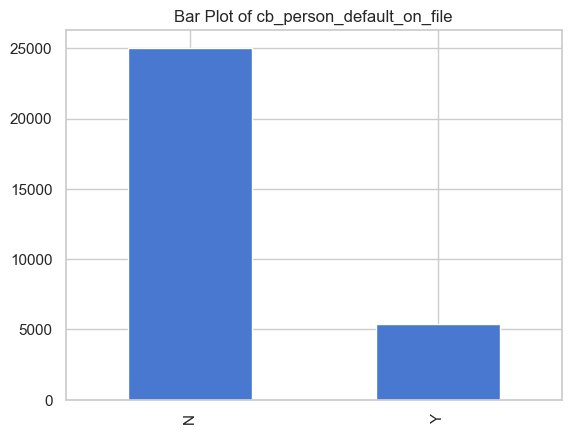

In [94]:
# Categorical variables: Bar plots
categorical_features = crd_filtered.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure()
    crd_filtered[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.show()

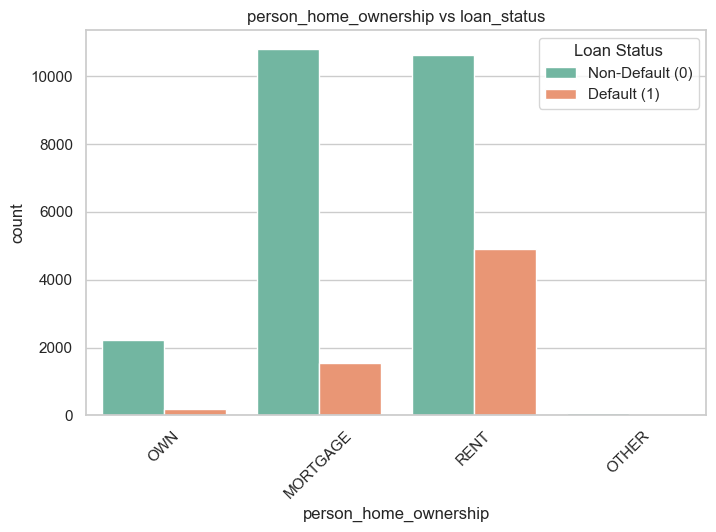

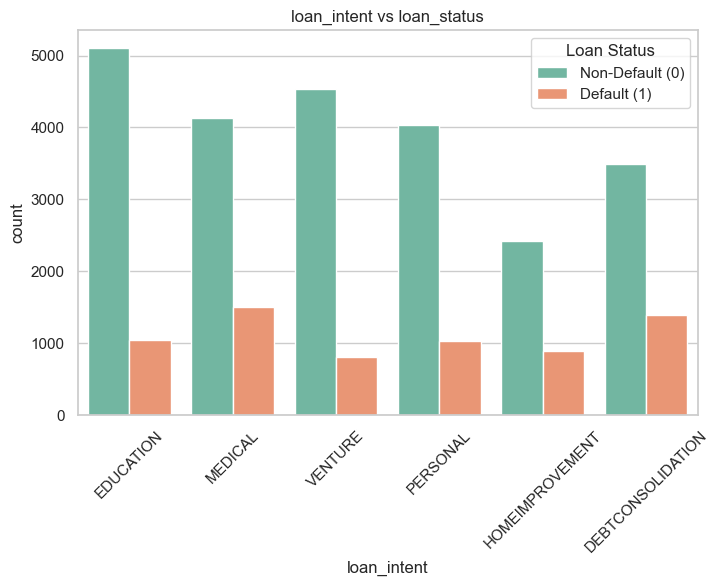

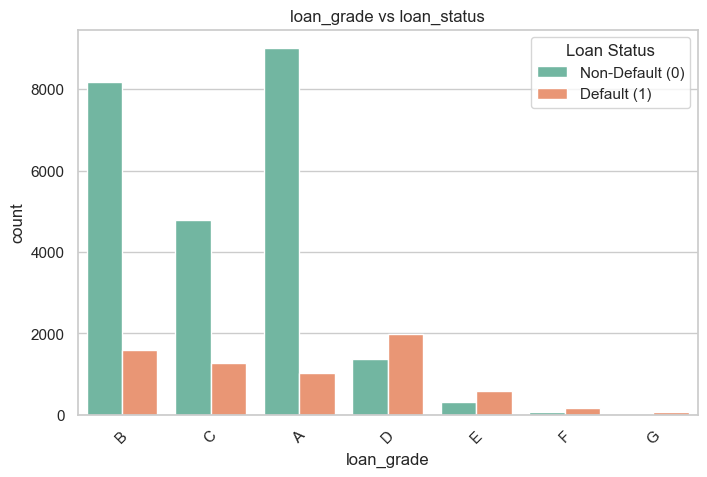

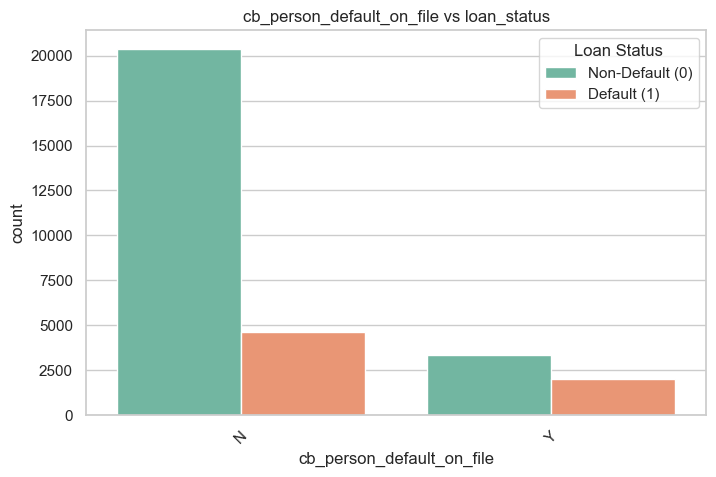

In [95]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

#plot categorical variables aganist 'loan_status'

for col in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(crd_filtered,x=col,hue='loan_status',palette='Set2')
    plt.title(f'{col} vs loan_status')
    plt.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'])
    plt.xticks(rotation=45)
    plt.show()  

## Numerical vs Target Variable(loan_status)

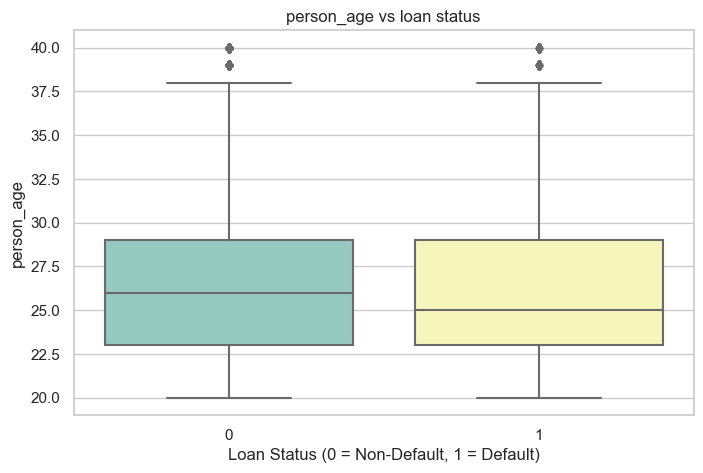

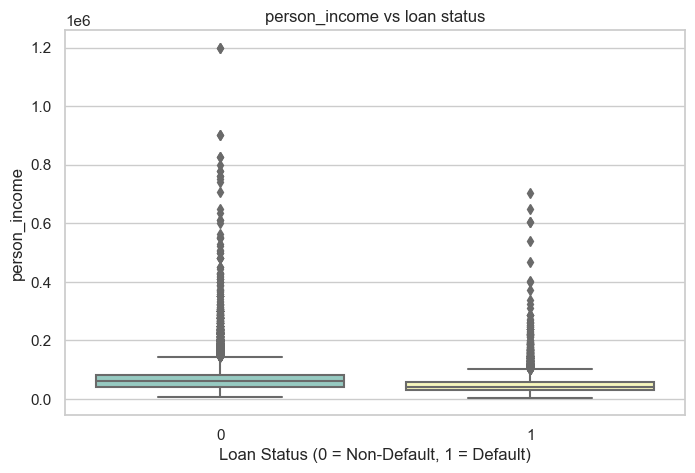

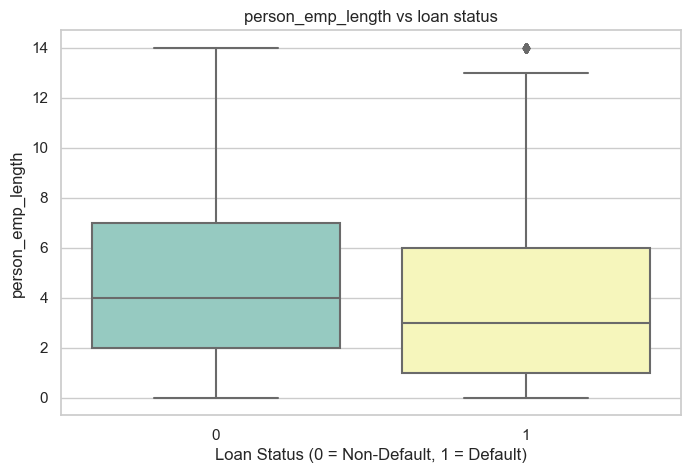

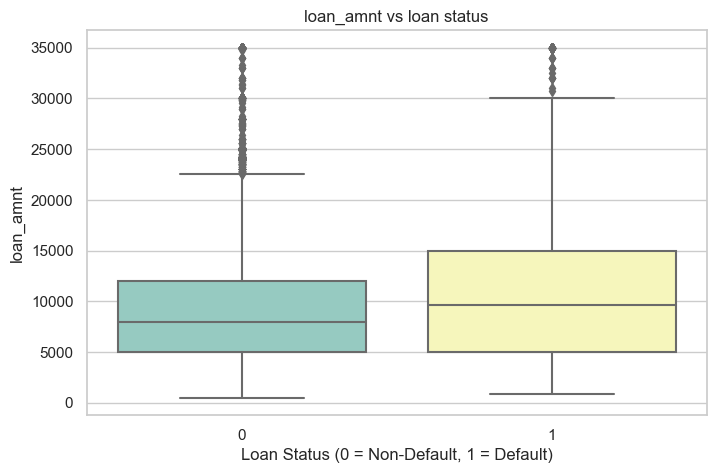

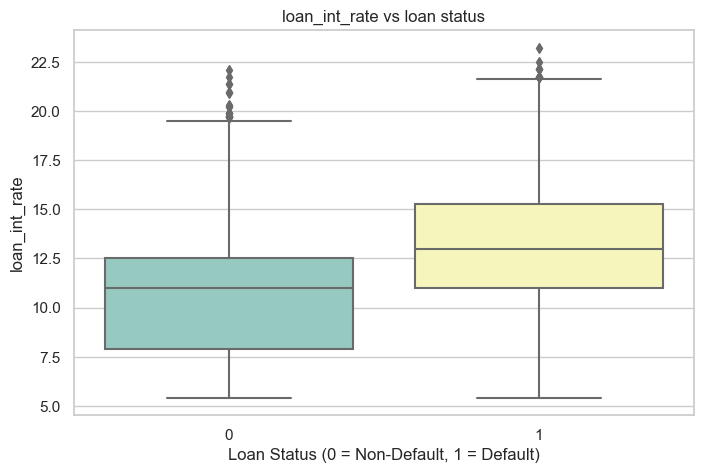

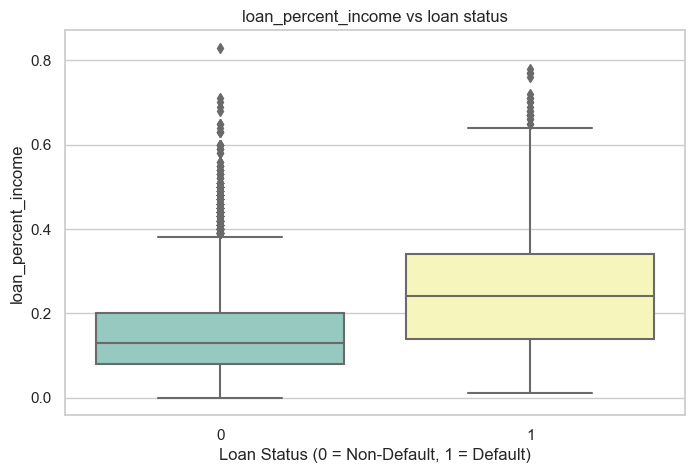

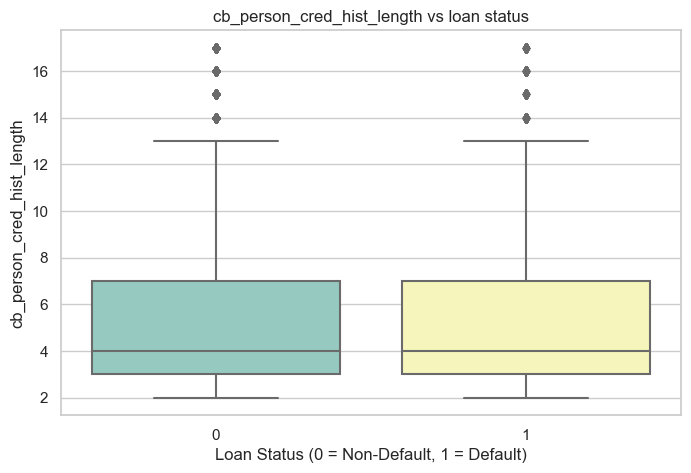

In [99]:
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(crd_filtered,x='loan_status',y=col,palette='Set3')
    plt.title(f'{col} vs loan status')
    plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
    plt.ylabel(col)
    plt.show()

In [ ]:
scrd_filtered[numerical_columns].corr()

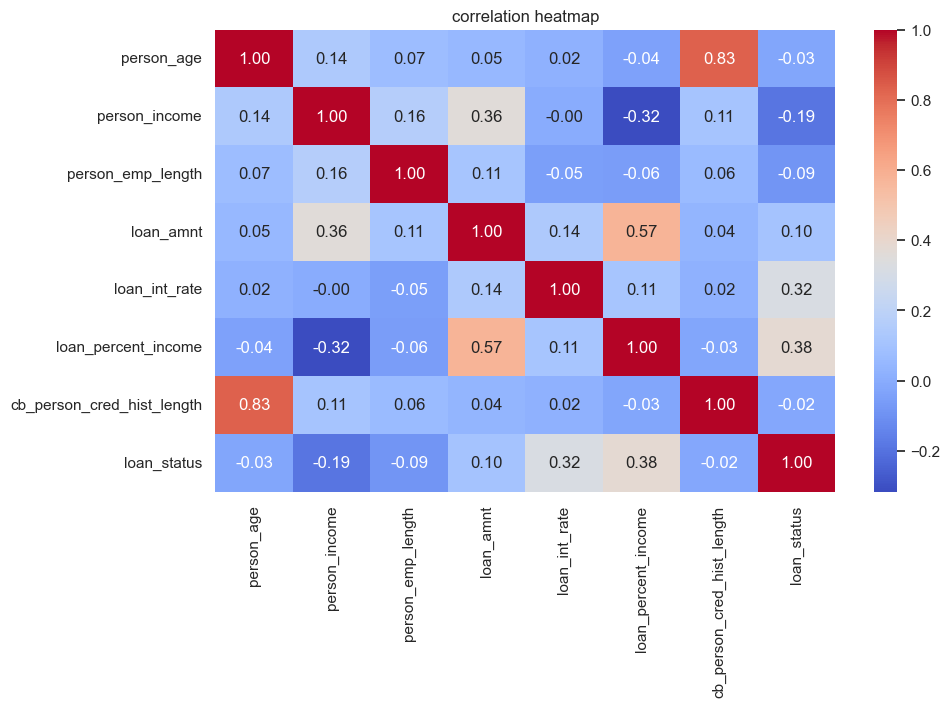

In [98]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10,6))
sns.heatmap(crd_filtered[numerical_columns+['loan_status']].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()

## Summary of Insights and Recommendations for the Bank

## Key Insights:
    
From the exploratory data analysis (EDA), we identified the following key patterns:

## 1.Categorical Features:

. Home Ownership (person_home_ownership): Applicants who "RENT" are more likely to default compared to those who "OWN" or have a "MORTGAGE."
    
. Loan Intent (loan_intent): Loans for "PERSONAL" or "SMALL BUSINESS" purposes have higher default rates, indicating greater risk.
    
. Loan Grade (loan_grade): Lower grades (e.g., D, E, F) are associated with higher defaults, reinforcing the importance of creditworthiness.
    
. Credit Bureau Default History (cb_person_default_on_file): Applicants with a prior default history ("Y") are significantly more likely to default again.

## 2. Numerical Features:

. Income (person_income): Defaulters tend to have lower incomes, making income a strong predictor of default risk.

. Loan Amount (loan_amnt): Larger loans show a higher likelihood of default, suggesting the need for stricter approval criteria for high-value loans.

. Interest Rate (loan_int_rate): Higher interest rates correlate with greater default risk. This may reflect the bank charging higher rates for riskier applicants.

. Loan Percent Income (loan_percent_income): Applicants with higher loan-to-income ratios experience more defaults, indicating financial strain.

. Credit History Length (cb_person_cred_hist_length): Applicants with shorter credit histories are at greater risk, underlining the importance of credit experience.

###  1. Employment Length vs. Loan Default

. Borrowers with shorter employment lengths (e.g., less than 2 years) are more likely to default compared to those with stable jobs over 5+ years.

. This suggests that job stability is a significant predictor of repayment ability.

### 2. Credit History Length and Default

. Borrowers with shorter credit histories (e.g., less than 4 years) are more prone to default. A limited credit history makes it harder for banks to assess repayment behavior.

. Conversely, individuals with longer credit histories tend to default less often, reflecting greater financial maturity.

### 3. Loan Interest Rates

. Loans with interest rates above 18% have a significantly higher default rate, indicating borrowers may struggle with repayment due to excessive financial burden.

### 4. Income Distribution
. Borrowers with annual incomes below $30,000 are at a greater risk of default, especially when loan amounts exceed 50% of their annual income.

. Income groups above $50,000 generally display healthier repayment behaviors.

### 5. Loan Purpose
. Education loans and medical loans demonstrate moderate default rates. However, small business loans exhibit the highest default rates due to inherent risks in entrepreneurship.

### 6. Co-Borrower Influence
. Borrowers with co-borrowers (joint applications) show lower default rates, indicating shared financial responsibility reduces risk.


#  Recommendations for the Bank:

### 1.Strengthen Risk Assessment:

. Implement stricter evaluation criteria for applicants with lower incomes, shorter credit histories, and higher loan-to-income ratios.

. Assign higher risk weights to loans for "PERSONAL" and "SMALL BUSINESS" intents.

### 2. Optimize Loan Approval Strategies:

. Cap the loan amount for high-risk groups, such as applicants with poor credit grades (D, E, F) or high loan_percent_income ratios.

. Offer smaller, less risky loans to applicants with limited credit histories to reduce potential losses.

### 3. Dynamic Interest Rates:

. Use the analysis to fine-tune interest rates. While higher rates compensate for risk, overly high rates may increase defaults. Consider balancing rate adjustments with affordability.

### 4. Default History Monitoring:

. Monitor applicants with prior default history (cb_person_default_on_file = Y) more closely and enforce higher collateral or guarantees.

### 5.Incentivize Early Repayment:

. Provide incentives (e.g., interest discounts) to encourage early loan repayment, especially for higher-risk groups.

### 6.Regular Monitoring and Feedback:

. Develop predictive models to automate risk scoring and integrate them into the loan approval process.

. Continuously analyze data to refine risk management strategies.
